In [64]:
library("tidyverse")
library("Hmisc")
#library("PerformanceAnalytics")


In [65]:
#Read in data and choose which dataset to use

heart <- read.csv("heart.csv", header=TRUE)
cars <- read.csv("USA_cars_datasets.csv", header=TRUE)
suicide <- read.csv("master.csv", header=TRUE)

data <- cars

In [66]:
#General dataset information about dataset

dim(data)
str(data)
has_rownames(data)

[1] 2499   13

'data.frame':	2499 obs. of  13 variables:
 $ X           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ price       : int  6300 2899 5350 25000 27700 5700 7300 13350 14600 5250 ...
 $ brand       : Factor w/ 28 levels "acura","audi",..: 28 9 8 9 6 8 6 10 6 9 ...
 $ model       : Factor w/ 127 levels "1500","2500",..: 26 93 76 33 1 76 87 33 72 76 ...
 $ year        : int  2008 2011 2018 2014 2018 2018 2010 2017 2018 2017 ...
 $ title_status: Factor w/ 2 levels "clean vehicle",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mileage     : num  274117 190552 39590 64146 6654 ...
 $ color       : Factor w/ 49 levels "beige","billet silver metallic clearcoat",..: 3 40 40 5 35 47 3 16 40 3 ...
 $ vin         : Factor w/ 2495 levels "  19uua96529a004646",..: 2393 1666 1886 968 2088 1650 1194 1239 1123 1706 ...
 $ lot         : int  159348797 166951262 167655728 167753855 167763266 167655771 167753872 167692494 167763267 167656121 ...
 $ state       : Factor w/ 44 levels "alabama","arizona",..: 25 36 8 40 7 37 8 4 7 37 ...


[1] FALSE

In [67]:
#Prepare dataset to allow for automated analysis
#Goal is for this cell to be the only required manual work

#Drop columns not needed in analysis
data_new <- subset(data, select = -c(model,vin,lot,condition))

#Set correct data type for columns

data_new$year <- as.factor(data_new$year)
data_new$mileage <- as.integer(data_new$mileage)

#Set index column if it exists
data_new <- data_new %>% remove_rownames() %>% column_to_rownames(var = "X")

#Print out new summary
str(data_new)

'data.frame':	2499 obs. of  8 variables:
 $ price       : int  6300 2899 5350 25000 27700 5700 7300 13350 14600 5250 ...
 $ brand       : Factor w/ 28 levels "acura","audi",..: 28 9 8 9 6 8 6 10 6 9 ...
 $ year        : Factor w/ 30 levels "1973","1984",..: 18 21 28 24 28 28 20 27 28 27 ...
 $ title_status: Factor w/ 2 levels "clean vehicle",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mileage     : int  274117 190552 39590 64146 6654 45561 149050 23525 9371 63418 ...
 $ color       : Factor w/ 49 levels "beige","billet silver metallic clearcoat",..: 3 40 40 5 35 47 3 16 40 3 ...
 $ state       : Factor w/ 44 levels "alabama","arizona",..: 25 36 8 40 7 37 8 4 7 37 ...
 $ country     : Factor w/ 2 levels " canada"," usa": 2 2 2 2 2 2 2 2 2 2 ...


In [68]:
#Function for univariate descriptive statistics for each column

num_descrip_stat <- function(x) {
    
    if (class(x) == 'integer'){
        y <- summary(x)}
    
    if (class(x) == 'factor'){
        a <- table(x)
        b <- as.data.frame(a)
        c <- round(100*prop.table(a),digits=2)
        b$Percentage <- c
        y<-b}
    
    return(y)
}



In [69]:
#Create list with univariate descriptive statistics for each column

output_list <- lapply(data_new, num_descrip_stat)

In [70]:
#Correlation analysis between numeric columns

#subset only numerical data
num_data <- dplyr::select_if(data_new, is.numeric)

#correlation matrix
corr <- rcorr(as.matrix(num_data))


In [71]:
#Density plots for numeric columns

dens_plots <- lapply(names(num_data),function(g) {
    ggplot(num_data, aes_(x=as.name(g)))+geom_density(color="black", fill="lightgrey")
})


In [72]:
#Create Bar Charts for Categorical Data

#subset only categorical data
cat_data <- dplyr::select_if(data_new, is.factor)

#Create list of bar charts for each categorical variable
bar_charts <- lapply(names(cat_data), function(g) {
  ggplot(cat_data, aes_(as.name(g))) + geom_bar()
})

In [73]:
#QQ Plots for Numerical Data

qq_plots <- lapply(names(num_data), function(g) {
  ggplot(num_data, aes_(sample=as.name(g))) + stat_qq()
})

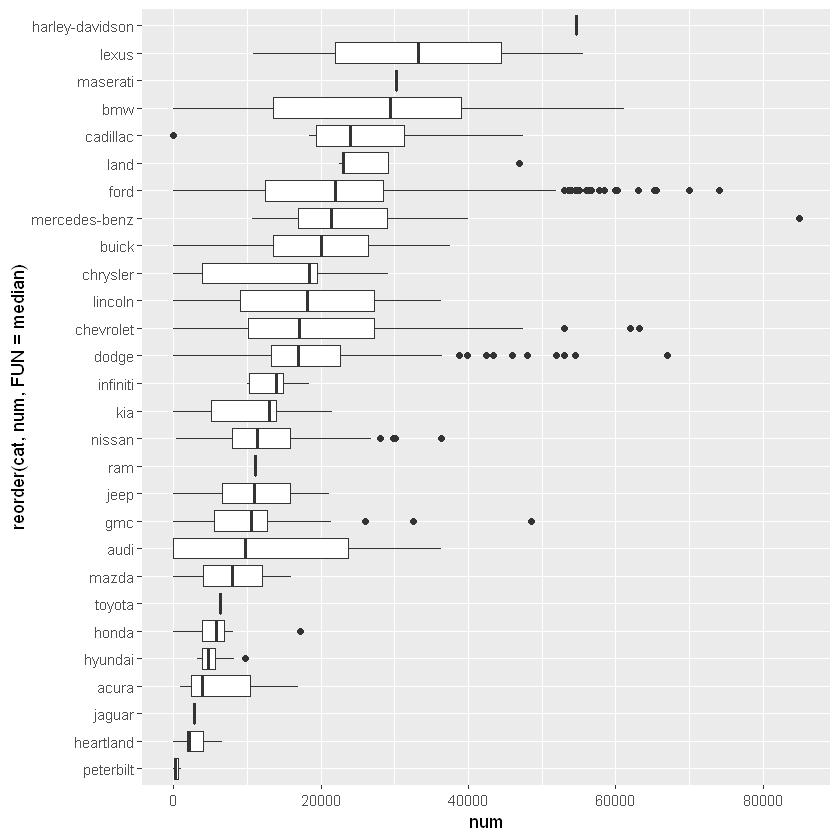

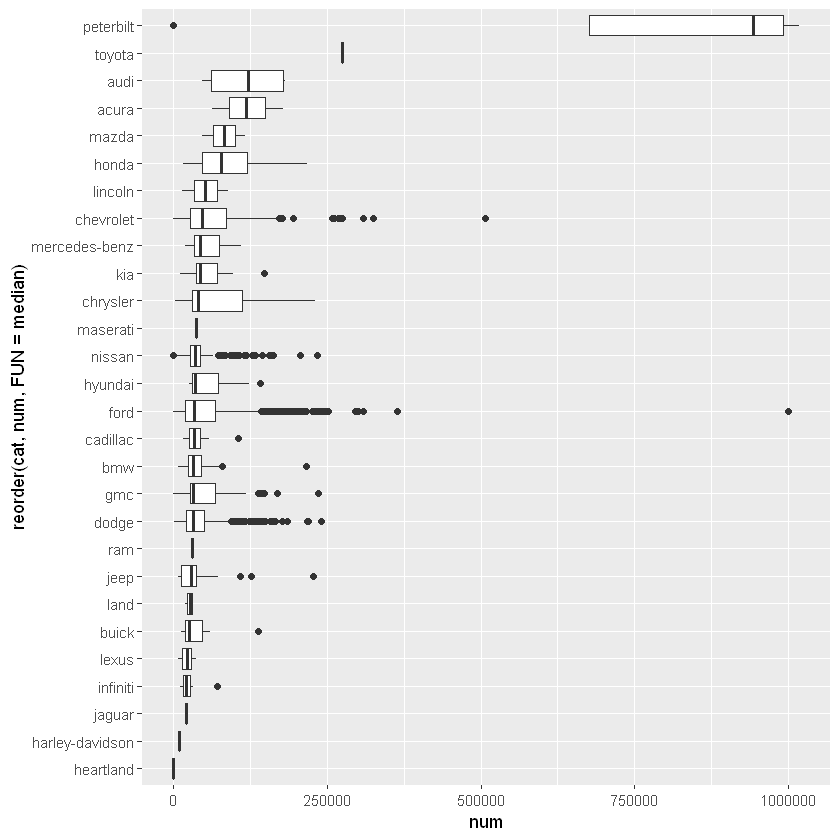

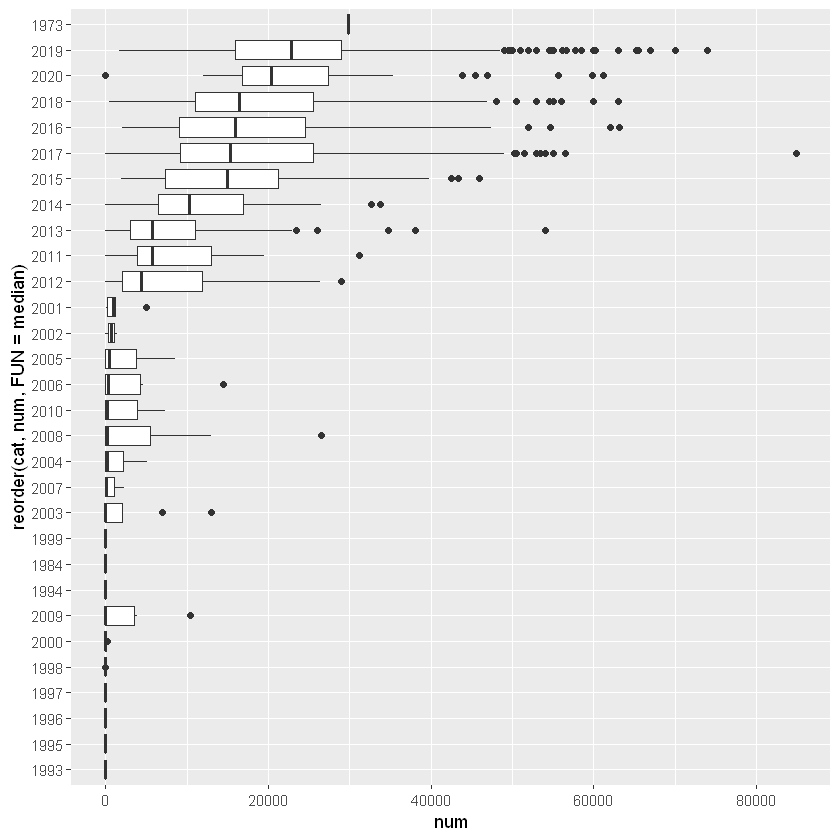

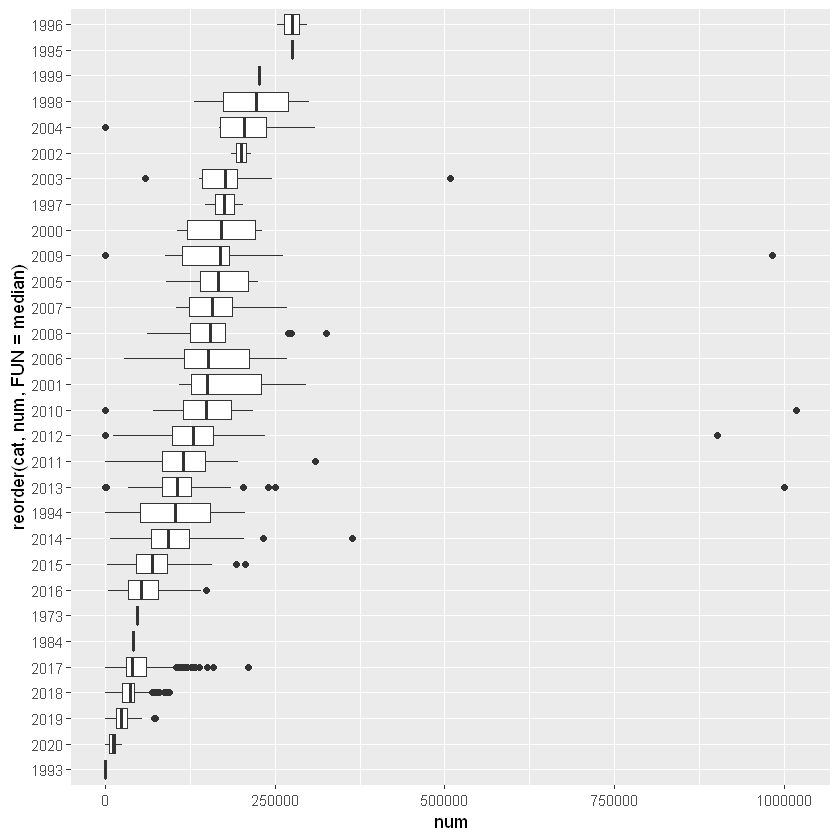

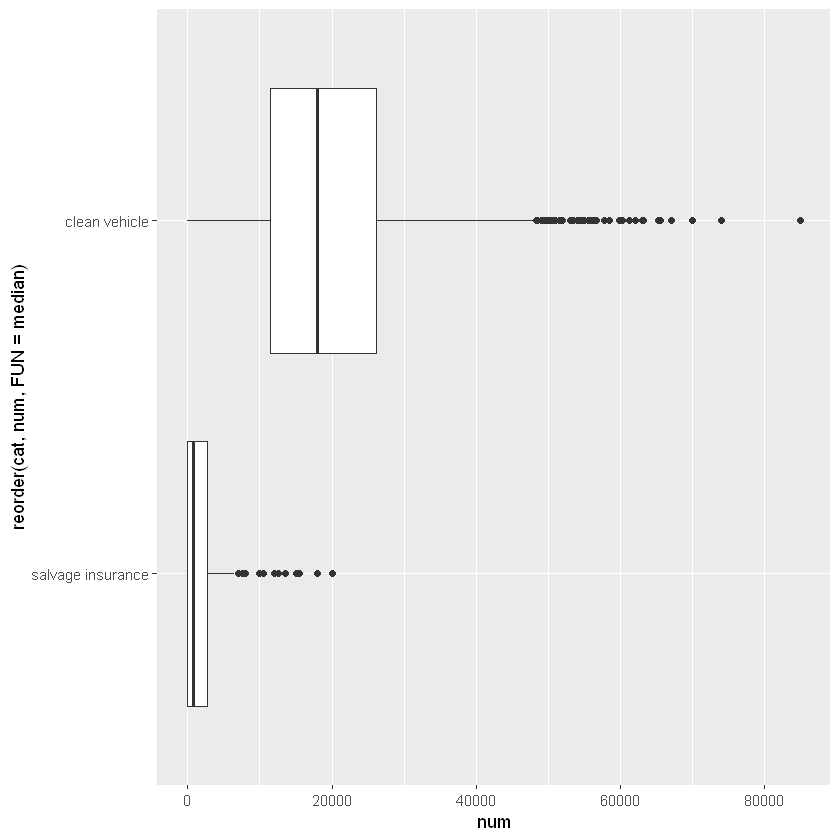

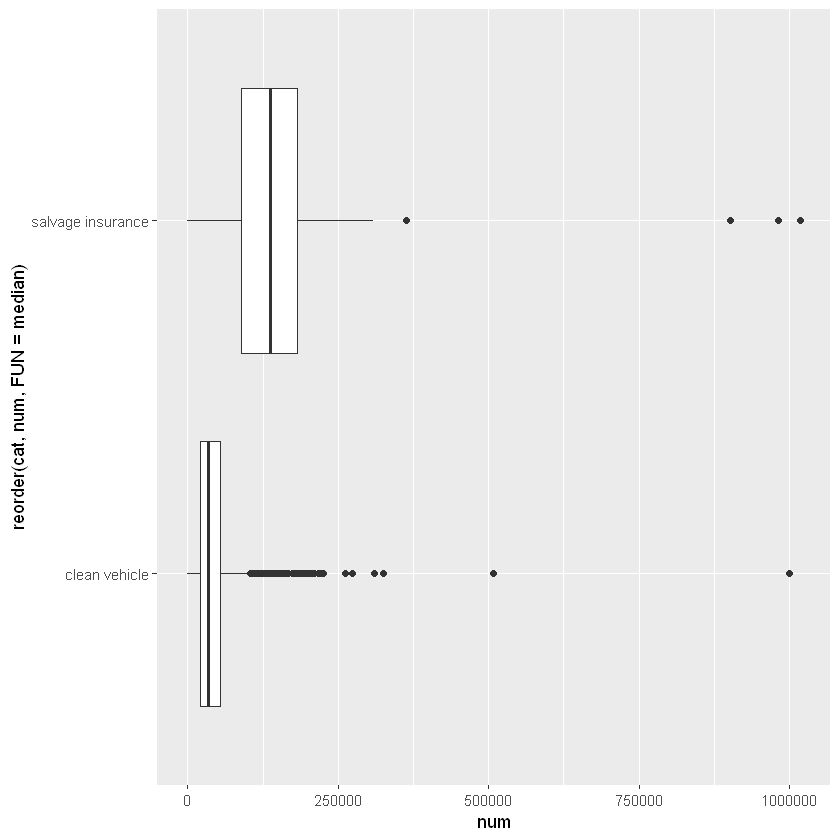

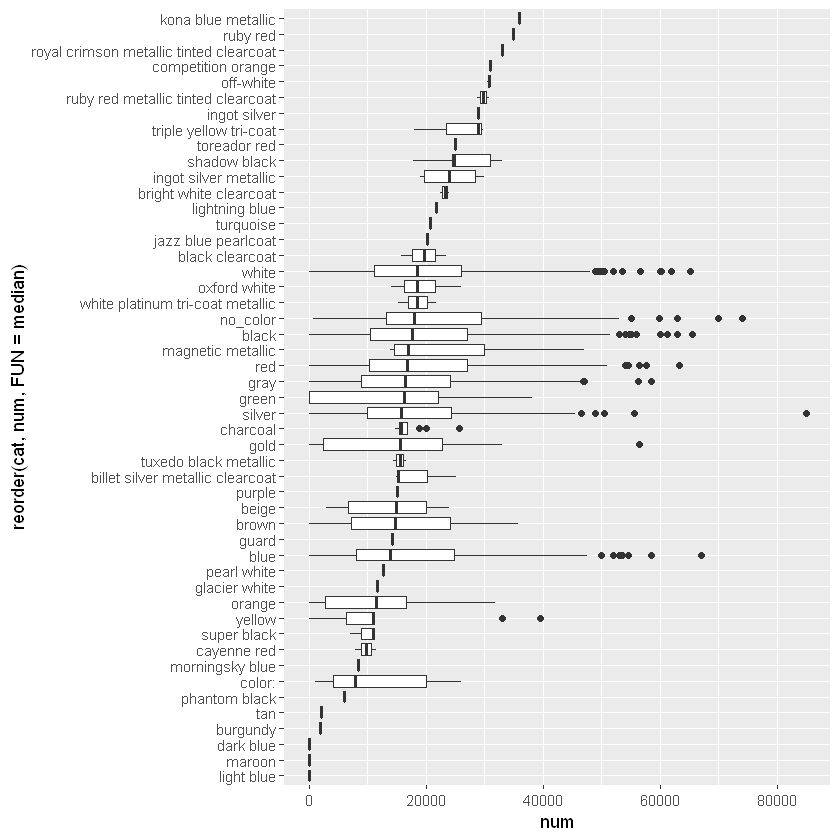

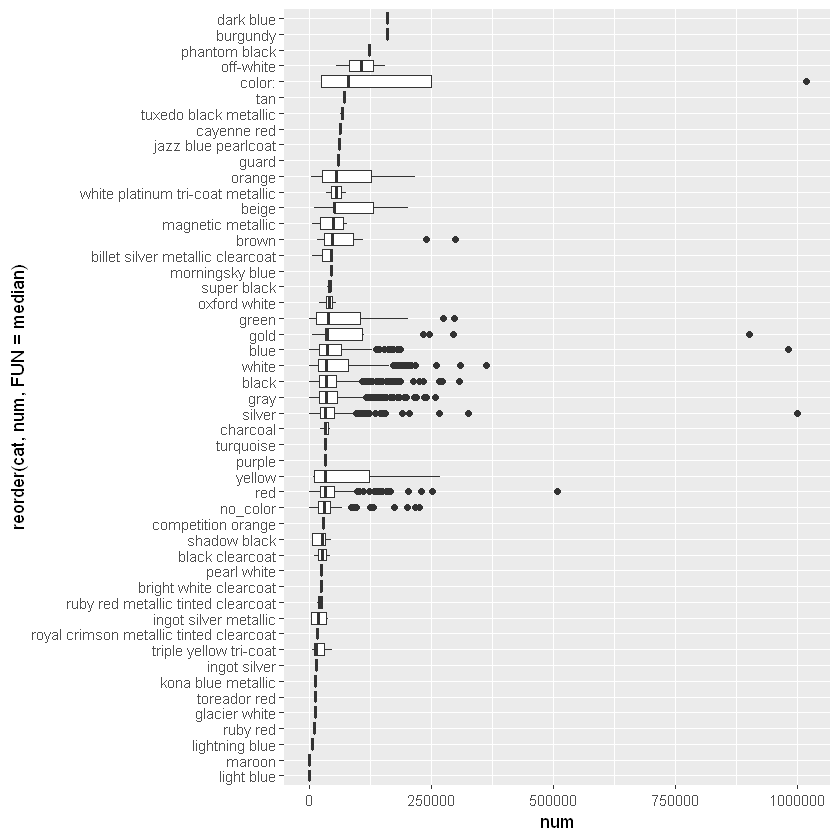

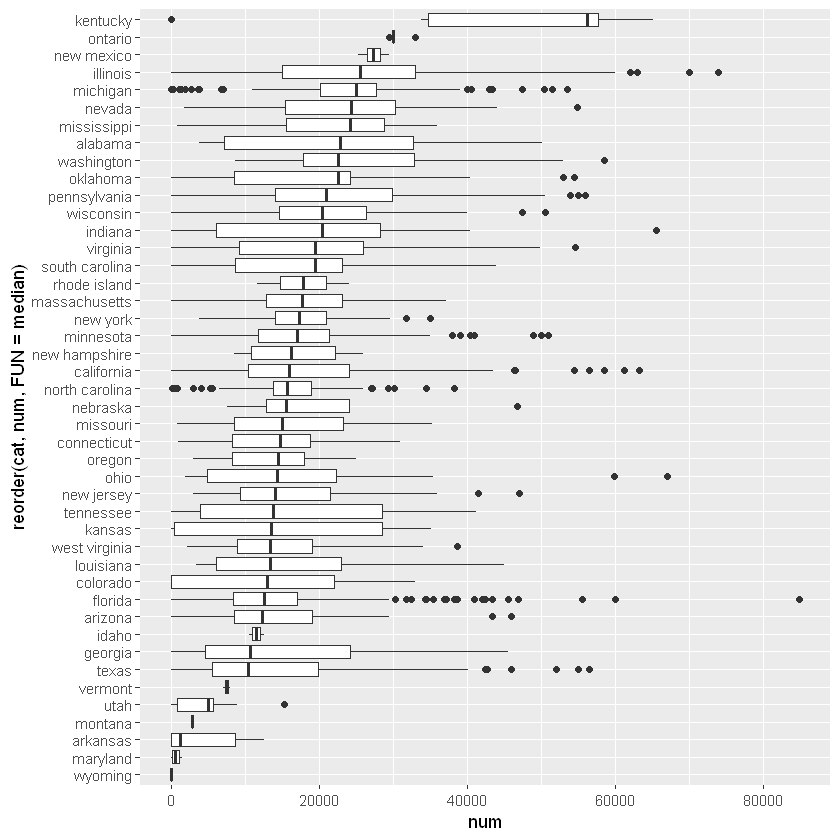

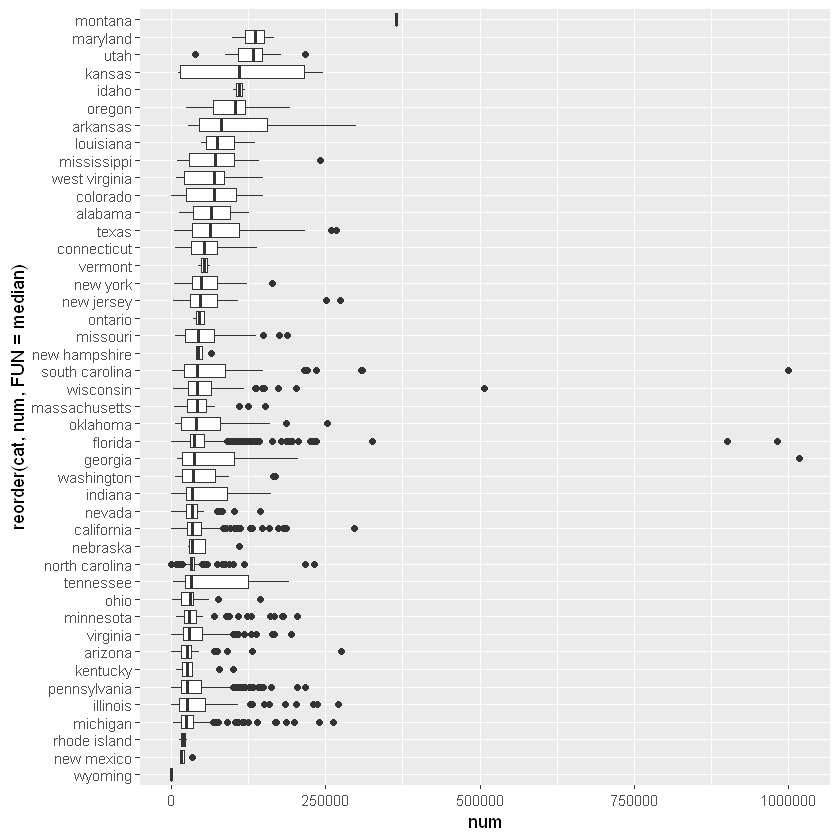

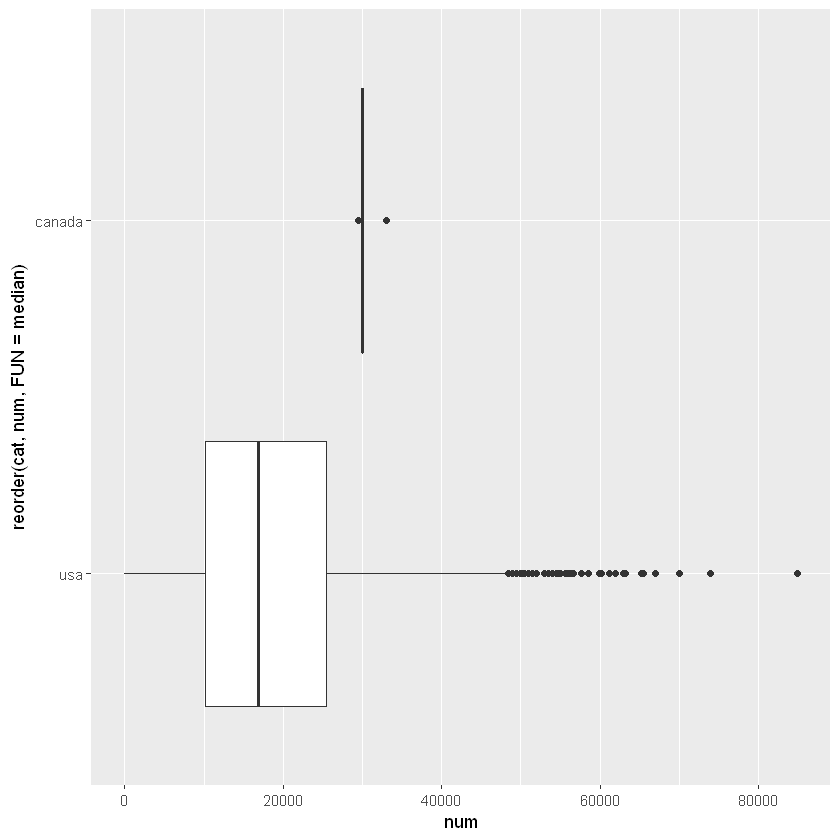

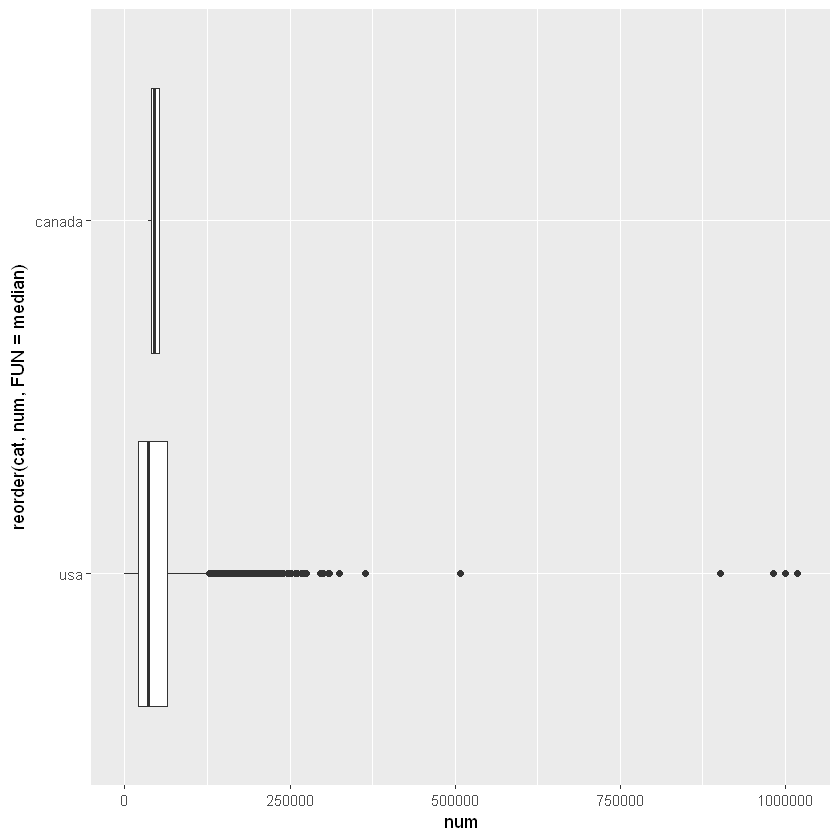

In [74]:
#Boxplot for each combination of categorical and numerical data

for (cat in cat_data){
    for (num in num_data){
    plot <- ggplot() + geom_boxplot(mapping = aes(x = reorder(cat, num, FUN = median), y = num))+coord_flip()
    print(plot)
        }
    }

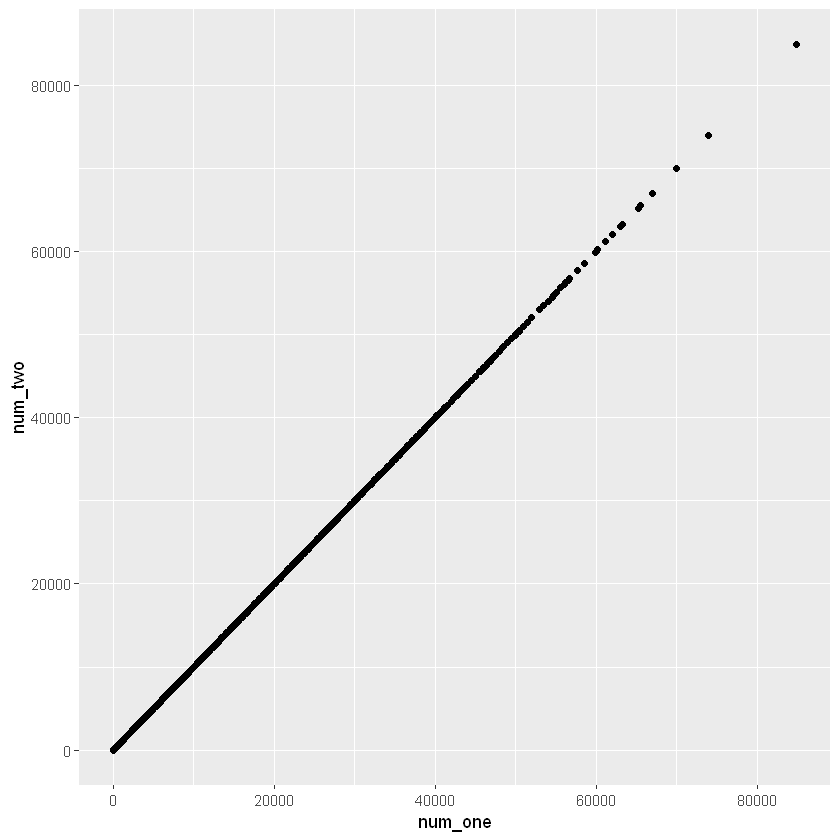

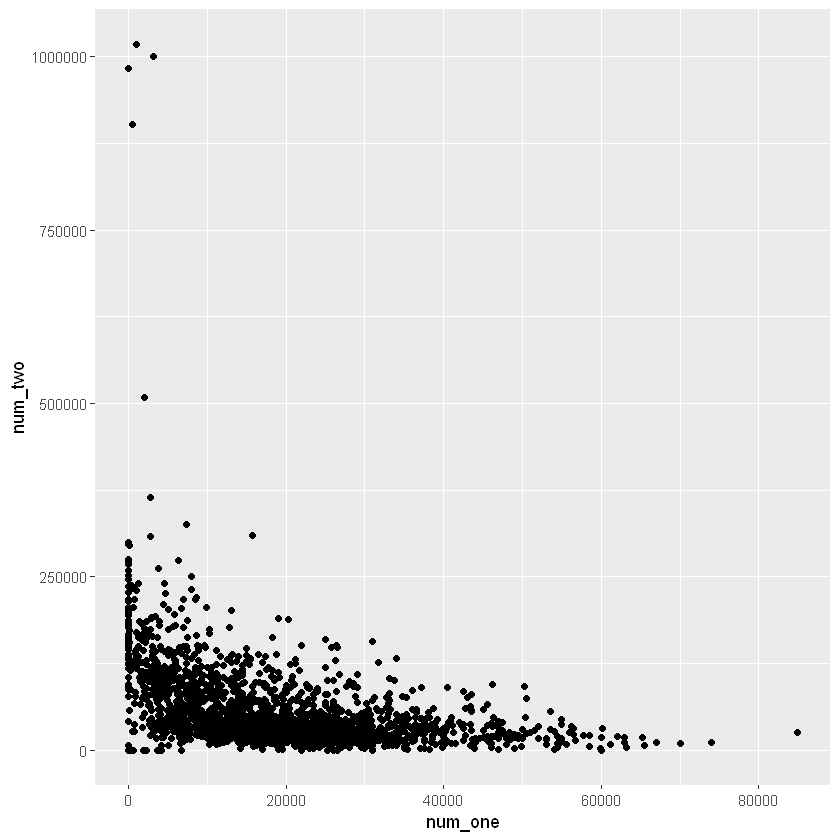

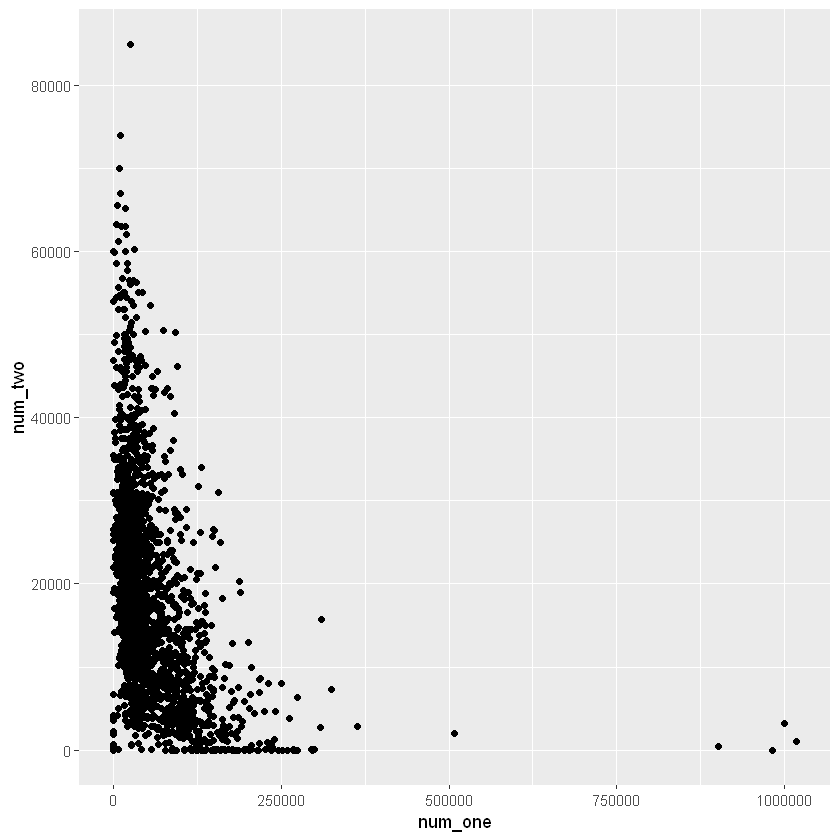

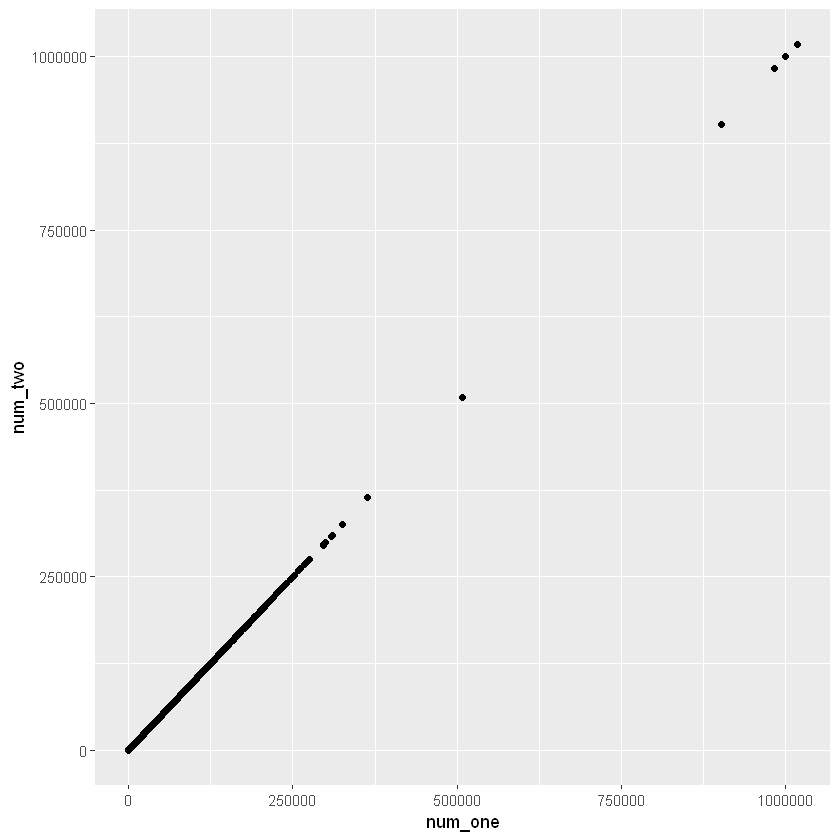

In [75]:
#Scatterplot for each combination of numeric columns

for (num_one in num_data){
    for (num_two in num_data){
    plot <- ggplot(num_data, aes(x=num_one, y=num_two))+geom_point()
        print(plot)
        }
    }

